In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, integrate

## Transmission spectrum of a periodically modulated TLS

In [5]:
# system parameters
gamma = 1.0  # total decay rate into waveguide, gamma = gamma_i + gamma_o
Omega = np.array([10.0*gamma, 2.5*gamma, 0.25*gamma])  # frequencies of fast, intermediate, and slow modulations
modulationAmp = np.array([5*gamma, 5*gamma, 5*gamma])  # modulation amplitudes

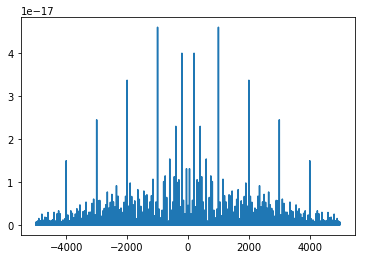

In [17]:
# modulation function
def modulationFunc(amp, freq, phase, tt):
    """
    The periodic modulation function Delta(t)
    """
    return amp*np.sin(freq*tt + phase)

def accumulatedPhaseFunc(amp, freq, phase, t):
    """
    The accumulated phase from the periodic modulation Delta(t)
    """
    integratedVal, abserr = integrate.quad(modulationFunc, 0, t, args=(amp, freq, phase,))
    return np.exp(-1.0j*integratedVal)

# t = np.linspace(0, 1, 1000)
# y = modulationFunc(5.0, 2*np.pi*50, 0, t) + modulationFunc(5.0, 2*np.pi*100, 0, t)
# plt.figure()
# plt.plot(t, y)

# freq = np.linspace(-499, 499, 999)
# spec = abs(scipy.fft(y))/len(t)
# spec1 = np.copy(freq)
# spec1[0:500] = np.copy(spec[500:1000])
# spec1[500:999] = np.copy(spec[1:500])
# spec2 = np.copy(spec[1:1000])
# plt.figure()
# plt.plot(freq, spec1)

tAxis = np.linspace(0, 1, 10000)
accumulatedPhase = np.linspace(0, 1, 10000)
for ii in range(len(tAxis)):
    accumulatedPhase[ii] = abs(accumulatedPhaseFunc(5, 10, 0, tAxis[ii]))

freq = np.linspace(-4999, 4999, 9999)
spec = abs(fft(accumulatedPhase))/len(tAxis)
spec1 = np.copy(freq)
spec1[0:5000] = np.copy(spec[5000:10000])
spec1[5000:9999] = np.copy(spec[1:5000])
spec2 = np.copy(spec[1:10000])
plt.figure()
# plt.xlim(-100, 100)
plt.plot(freq, spec1)


In [22]:
mu = np.linspace(-15, 15, 1000)
S_omega_mu = np.zeros(1000)
for ind in range(1000):
    Sp = np.arange(1001)
    for ii in range(1001):
        for jj in range(1001):
            p = ii - 500
            m = jj - 500
            alpha_m = spec1[(m + 499)*10 - 1]
            alpha_mp = spec1[(m + 499)*10 - 1]
            if ((m + p) > 500) or ((m + p) < -500):
                alpha_mp = 0
            Sp[ii] += -1.0*(alpha_m.conjugate()*alpha_mp)/(gamma/2 + 1.0j*(m*10 - mu[ind]))
            S_omega_mu[ind] += abs(Sp[ii])**2
            
plt.figure()
plt.plot(mu, S_omega_mu)

/Users/zhanyuan/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


KeyboardInterrupt: 

In [ ]:
# system parameter initialization
class modulation:
    """
    Define the periodic modulation applied to the TLS
    """
    def __init__(self, amp, freq, phase):
        """
        Initialization of the modulation parameters.
        
        Args:
            amp: Amplitude of the monochromatic modulation;
            freq: Frequency of the monochromatic modulation;
            phase: Phase of the monochromatic modulation.
        """
        self._amp = amp
        self._freq = freq
        self._phase = phase
        

class modulatedTLS:
    """
    Define the paremeters for a periodically modulated two-level system.
    """
    def __init__(self, omega_0, gamma, amp, freq, phase):
        """
        Initialization of a 'modulatedTLS' object under monochromatic modulation.
        
        Args:
            omega_0: Unmodulated resonance frequency of the TLS;
            gamma: Total decay rate of TLS;
            amp: Amplitude of the monochromatic modulation;
            freq: Frequency of the monochromatic modulation;
            phase: Phase of the monochromatic modulation.
        """
        self._omega_0 = omega_0
        self._gamma = gamma
        self._amp = amp
        self._freq = freq
        self._phase = phase
        
    def hamiltonian_sys(self):
        """Compute the system Hamiltonian."""